**Candidate Number:** 291736 


**Python version 3.7.9**

# Algorithmic Data Science Report and code


# **Introduction**
Contents:
1. **Introduction** (this part)
2. **Cosine Similarity Analysis** (Question 1)
3. **Jaccard Similarity Analysis** (Question 2)
4. **All-Pairs Similarity Complexity** (Question 3)
5. **Parallel All-Pairs Similarity** (Question 4)
6. **Strassen's Method Efficiency** (Question 5)
7. **Conclusion and Summary**
    

# INTRODUCTION

The project focuses on **content-based recommender systems, plagiarism detection, and clustering** using **Cosine and Jaccard similarity measures**. It covers their theoretical and empirical time complexities. The concept of all-pairs similarities is introduced, followed by the implementation of **Jaccard all-pairs similarity** using parallel computing with functions from defs.py and defs2.py. Finally, Cosine similarities are compared using Strassen multiplication, with time complexities analyzed for all methods. Data is sourced from the "data2024.csv" file.

In [1]:
#I m importing some basic library for now.
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data2024.csv', index_col=0)

In [3]:
df.shape

(21198, 15)

In [4]:
df1=df.iloc[:1000] #extracting subset of rows
df1.head()

doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
Abashed      0     0     0     0     0     0     0     0     0      0      0   
Abednego     0     0     0     0     0     0     0     0     0      0      0   
Abel         0     0     0     0     0     0     0     1     0      0      0   
Abjectus     0     0     0     0     0     0     1     0     0      0      0   
Aboard       0     0     0     0     0     1     0     0     0      0      0   

          doc12  doc13  doc14  doc15  
Abashed       0      0      1      0  
Abednego      0      1      0      0  
Abel          0      0      0      0  
Abjectus      0      0      0      0  
Aboard        0      0      0      0

In [5]:
df_values=df1.values
df_values
#numpy.ndarray- we created a numpy.ndarray from the data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
df_list = df_values.tolist()
df_list

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2],
 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [7]:
samples = list(map(int, np.linspace(50, 1000, 100)))
samples1=list(map(int,np.linspace(50,20,10000)))#larger samples
#samples-It generates an array of 100 evenly spaced values between 50 and 1000 (inclusive). 
#The third argument, 100, specifies the number of samples.Converting the result into a list

In [8]:
samples_doc = [random.sample(df_list,s) for s in samples]
samples_doc_1 = [random.sample(df_list,s) for s in samples]
samples_doc_2=[random.sample(df_list,s) for s in samples1]
#This function selects unique random elements from the df1_list list.
#This is a list comprehension that creates a list of random samples for each sample size in the samples list.


Sublists of random samples will be included in this list; each sublist will correspond to a different sample size that listed in the samples list.

In [9]:
samples_doc_1

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 1, 2, 1, 2, 1, 0, 3, 10, 1, 4, 4, 3],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 3, 5, 2, 0],
  [0, 0, 0, 2, 4, 3, 5, 5, 3, 4, 4, 1, 9, 20, 17],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0,

In [10]:
print(type(samples_doc_2))

<class 'list'>


I am building make_freq_dist function where I am taking a list of list (doclists). It will go through each of these lists and transform it into a tuple. This will be an important in a dictionary . The value is the number of times that tuple occurs in the doclist. It will increment the count if the tuple is in the dictionary otherwise it will a count of 1

In [11]:
#lab work
def make_freq_dict(doclists):
    my_dict = {}
    for item in doclists:
        # Convert the list to a tuple before using it as a key
        item_tuple = tuple(item)
        my_dict[item_tuple] = my_dict.get(item_tuple, 0) + 1
    return my_dict
#create_collection_samples will return a list of dictionary
def create_collection_samples(samples):
    docs = []
    for words in samples:
        docs.append(make_freq_dict(words))
    return docs

docs_list = create_collection_samples(samples_doc)
docs_list_1 = create_collection_samples(samples_doc_1)
docs_list_2=create_collection_samples(samples_doc_2)



In [12]:
docs_list_1 #list of dictionary

[{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 2,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 2,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 5,
  (1, 1, 0, 1, 2, 1, 2, 1, 0, 3, 10, 1, 4, 4, 3): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 6,
  (0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 3, 5, 2, 0): 1,
  (0, 0, 0, 2, 4, 3, 5, 5, 3, 4, 4, 1, 9, 20, 17): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 3,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 2,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 4,
  (0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0): 1,
  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 

# Taken from lab work

In [13]:
#time function
#It will be useful during time complexity analysis
def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
    return ans,mean,error

# Q1. 

## Cosine Similarity 

This is based on mathematical concepts (cosine similarity) which is used to find similarity between two vectors.

\begin{gather*}
cos(A,B)=\frac{A.B}{ \sqrt{A.A*B.B}}
\end{gather*}

- A and B are the two vectors. The dot product of this two is A.B

In [14]:

#I am creating make_matrix function where I took list of dictionary as input.
#This will return a transpose of a matrix.
#The code below will turn the dictionary representation of documents into a characteristic matrix
def make_matrix(list_of_dicts):
    all_features = {}    
    for doc_dict in list_of_dicts:
        for feat in doc_dict.keys():
            all_features[feat] = 1
    
    dimensions = list(all_features.keys())
    sorted(dimensions)
    
    matrix = []
    for dimension in dimensions:
        row = []
        for doc_dict in list_of_dicts:
            row.append(doc_dict.get(dimension, 0))
        matrix.append(row)
        


    transposed = []
    for i in range(0, len(matrix[0])):
        transposed.append([row[i] for row in matrix])
    return transposed

In [15]:
#cosine similarity code-lab
import math

def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

def cosine(v1,v2):
    
    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

## 1.1 Present an analysis of the theoretical running time of the cosine similarity measure applied to a pair of documents with data in the format of the provided data matrix.

- There are two functions in cosine code which you can see above-dot() and cosine(). V1 and V2 are two vectors.

- **dot()** function used to calculate dot product of two vectors. For vector of length n, loop is being run n times. Time complexity of dot function will be 
**O(n)**.

- **cosine** dot three times, One time in numerator, twice in denominator (O(3n)) math. It takes a constant time O(1) to calculate sqrt(). So total time complexity of cosine_similarity will be *O(n)**


In [16]:
doc_vectors=[make_matrix([d]) for d in docs_list_1] #list of vectors
# doc_vectors

In [17]:
times_cosine_sim=[]
for i in range(len(docs_list_1)):
    times_cosine_sim.append(timeit(cosine,doc_vectors[i][0],doc_vectors[i][0])[1])

In [18]:
xs=[len(d) for d in docs_list_1]

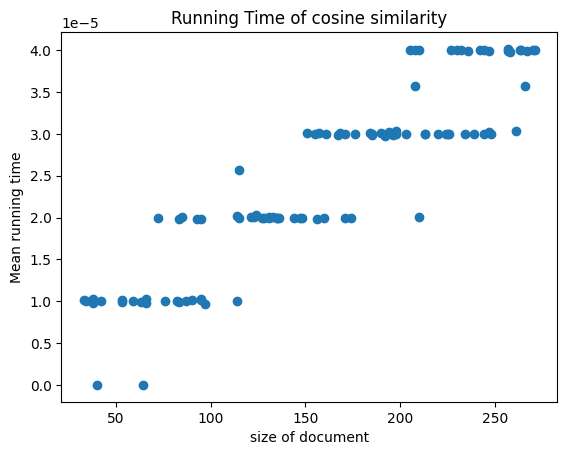

In [19]:
plt.scatter(xs,times_cosine_sim)
plt.title('Running Time of cosine similarity')
plt.xlabel('size of document')
plt.ylabel('Mean running time')
plt.show()

## 1.2 Test your analysis empirically by timing and plotting various calculations of cosine similarity on your computer. Estimate the crucial constant in the formula for the run-time, for your implementation and computer. 

If $y=c_a.x^\alpha$ then it follows that:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
so if we plot a graph of $\log(y)$ against $\log(x)$ the gradient will be $\alpha$ and the y intercept will be $\log(c_a)$

I calculate the slope and constant below. slope is coming around 0.82 which means it should be O($n^{0.82}$). Also the constant  $c_a$ for the computation is of the order of  $10^{-14}$.

So, emperically I can write the function as      y=$10^{−14}$ $x^{1}$

-y is runtime of function


-x is length of vectors





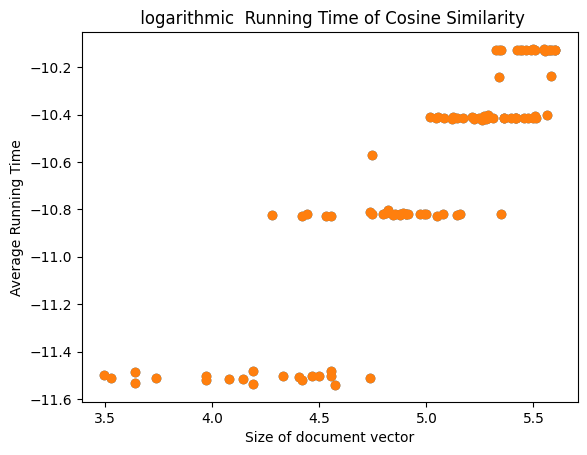

In [20]:
logxs, logys = zip(*[(np.log(x), np.log(y)) for x, y in zip(xs, times_cosine_sim) if x > 0 and y > 0])
logxs, logys = zip(*[(np.log(x), np.log(y)) for x, y in zip(xs, times_cosine_sim) if x > 0 and y > 0])
plt.scatter(logxs,logys)
plt.scatter(logxs,logys)
plt.title(' logarithmic  Running Time of Cosine Similarity')
plt.xlabel('Size of document vector')
plt.ylabel('Average Running Time')
plt.show()

In [21]:

import scipy.stats as stats
res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))


Slope is 0.8100624245053922 and intercept is -14.720609032091735


## 1.3 Compare using the implementation of the dot product in numpy with your own implementation.

Accessing an element in numpy array using numpy is O(1) So we have 3 usages of dot product, Hence numpy solution is faster than cosine_similarity. Dot product between two vector of length n there time complexity is O(n) Where n is the number of items to be inserted, So the timecomplexity is thus: O(n).

**numpy implementation which is about O(n) but even more faster than cosine without numpy.**

In [22]:
def cosine_similarity_numpy(v1,v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1,v2) / (np.sqrt(np.dot(v1,v1)) * np.sqrt(np.dot(v2,v2)))

In [23]:
times_cosine_numpy = []
for i in range(len(docs_list)):
      times_cosine_numpy.append(timeit(cosine_similarity_numpy, doc_vectors[i][0], doc_vectors[i][0])[1])

In [24]:
xs_numpy=[len(d) for d in docs_list]

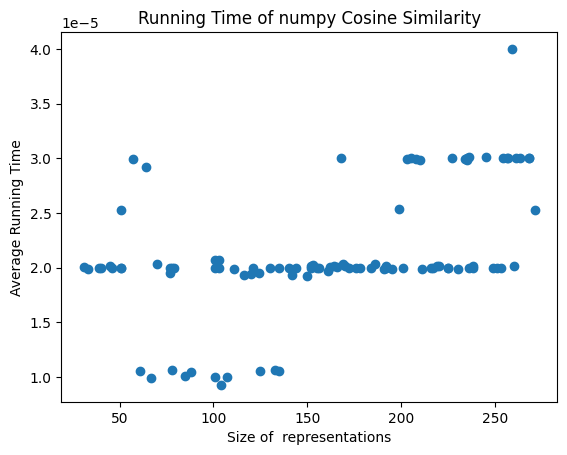

In [25]:
plt.scatter(xs_numpy,times_cosine_numpy)
plt.title('Running Time of numpy Cosine Similarity')
plt.xlabel('Size of  representations')
plt.ylabel('Average Running Time')
plt.show()

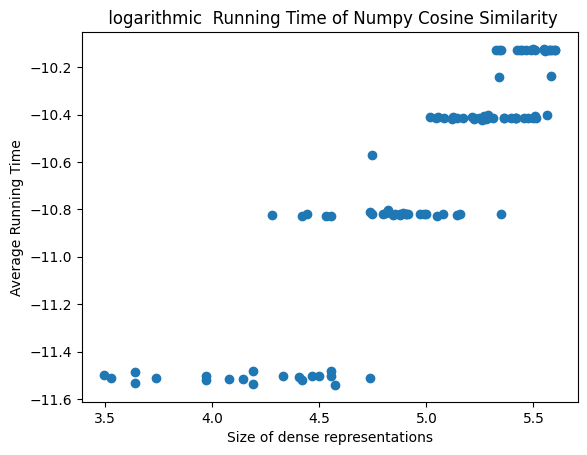

In [26]:
logxsnumpy=[np.log(x) for x in xs_numpy]
logysnumpy=[np.log(y) for y in times_cosine_numpy]
plt.scatter(logxs,logys)
plt.title(' logarithmic  Running Time of Numpy Cosine Similarity')
plt.xlabel('Size of dense representations')
plt.ylabel('Average Running Time')
plt.show()

In [27]:

import scipy.stats as stats
res = stats.linregress(logxsnumpy, logysnumpy)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 0.20846500465368675 and intercept is -11.831894127998668


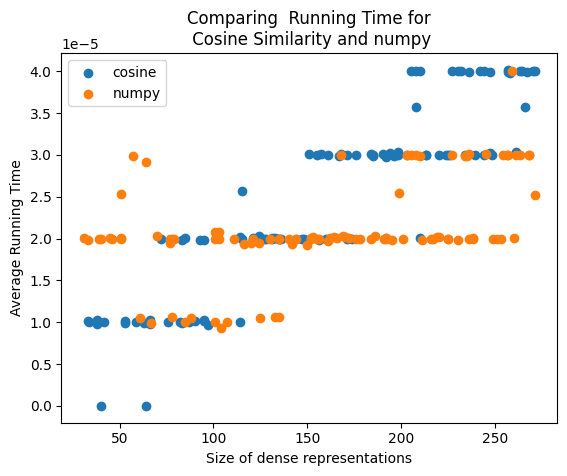

In [28]:
plt.scatter(xs, times_cosine_sim, label='cosine')
plt.scatter(xs_numpy, times_cosine_numpy, label='numpy')
plt.title('Comparing  Running Time for\n Cosine Similarity and numpy')
plt.xlabel('Size of dense representations')
plt.ylabel('Average Running Time')
plt.legend(loc='best')
plt.show()

slope for numpy is coming around 0.48 which means it should be **O($n^{0.48}$)$\approx$ O(n)**.
Also the constant  $c_a$ for the computation is of the order of  $10^{-13.19}$.

Emperically, I can see numpy cosine is more faster than the cosine. I can write the function as  

y=$10^{−13.1}$ $x^{0.48}$

 

# Q2. 
## Jaccard Similarity 

Jaccard's similarity is a concept which is used to find similarity between bags of words. It is the ratio of common elements in the set (intersection) and to the union of two sets(union).
                     
                     

\begin{gather*}
J(A,B)=\frac{|A\cap B|}{|A \cup B|}
\end{gather*}

- ${|A\cap B|}$ is the number of elements after intersection of two sets A and B. 
- ${|A \cup B|}$ is the number of element after union of two sets A and B

In [29]:
## jaccard-lab work

def maketotal(dict1):
    total = 0
    for item in dict1.values():
        total += item
    return total

def jaccard(dict1, dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item], dict2[item])

    intersectiontot = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersectiontot
    return intersectiontot / union 
print(jaccard(docs_list[1],docs_list[6]))
print(jaccard(docs_list[1],docs_list_2[5]))
print(jaccard(docs_list[1],docs_list[1])) #same document

0.30708661417322836
0.4025974025974026
1.0


## Q2.1 Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to a pair of documents with data in the format of the provided data matrix.

- dict1,dict2- two dictionary.

- The **maketotal()** function iterate over the values of dictionary and sums them. Its timecomplexity is **𝑂(n)**

- The **Jaccard()** function iterates over the crucial of two dictionaries to find the intersection . Then I am doing the union of this two dictionaries. its worst case running time is **𝑂(n)**. The final step is to divide the intersection and union. 

- Now if both sets are same,their similarity is 1. If it's completely different, then similarity is 0 which is a worst case scenario where loop will iterate over all the words in second list. In that scenario,time complexity is quardratic **𝑂($n^2$)**. As the size of dictionary increases,there's a chance of increase in collision which may result in increase of execution time.

In [30]:
times_jaccard=[]
for i in range(len(docs_list)):
    times_jaccard.append(timeit(jaccard,docs_list[i],docs_list[i])[1])

In [31]:
xs_jaccard=[len(d) for d in docs_list]

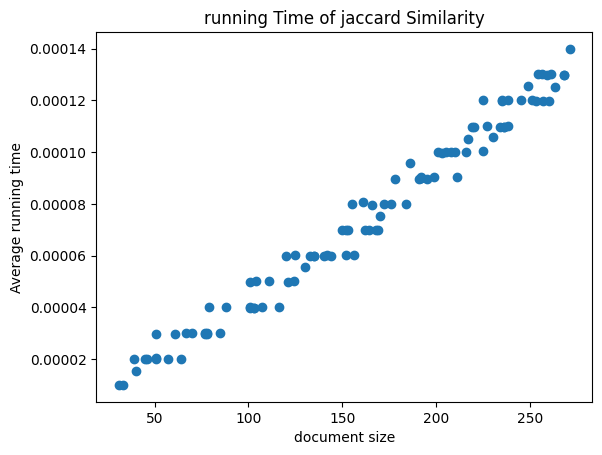

In [32]:
plt.scatter(xs_jaccard,times_jaccard)
plt.title('running Time of jaccard Similarity')
plt.xlabel('document size')
plt.ylabel('Average running time')
plt.show()

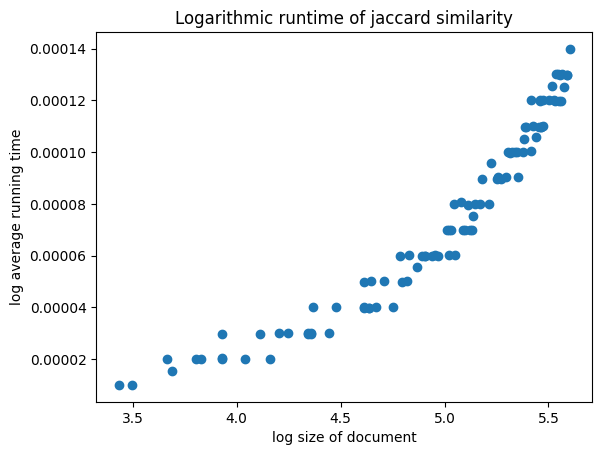

In [33]:
logxsjac=[np.log(x) for x in xs_jaccard]
logysjac=[np.log(y) for y in times_jaccard]
plt.scatter(logxsjac,times_jaccard)
plt.title('Logarithmic runtime of jaccard similarity')
plt.xlabel('log size of document')
plt.ylabel('log average running time')
plt.show()

In [34]:
import scipy.stats as stats
res = stats.linregress(logxsjac, logysjac)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.1237200992061538 and intercept is -15.229980593692769


## Q2.1 Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate the crucial constant in the formula for the run-time, for your implementation and computer.


I calculate the slope and constant below. slope is coming around 1.05 which means it should be 

O($n^{1.0}$) $\approx$ O(n).

Also the constant  $c_a$ for the computation is of the order of  $10^{-14}$.

So, emperically,function is
y=$10^{−14}$ $x^{1}$


# Q3 

## All Pairs similarity 
  
- I created a function **all_pairs_similarities()** which compute all pair similarity of document lists. Here we are taking docs (list of documents) and similarity as paramenter.
- There are three similarity-'jaccard','cosine' and 'cosine similarity numpy'. we are calling the function depending on the similarity which I will give.
- Here this function will iterate through all the documents(two for loops). So the time complexity in this case should be  O($n^{2}$)

In [35]:
#combining lab work execrcise 3 and 5 of unit6
def all_pairs_similarities(docs,similarity_measure):
    pairwise_sim=[]
    if similarity_measure=='jaccard':
        sim=jaccard
    elif similarity_measure=='cosine':
        sim=cosine
        docs=make_matrix(docs)
    elif similarity_measure=='cosine_similarity_numpy':
        sim=cosine_similarity_numpy
        docs=make_matrix(docs)
    else:
        return print('Invalid similarity')
    for doc1 in docs:
        for doc2 in docs:
            pairwise_sim.append(sim(doc1,doc2))
    return pairwise_sim

## 3.1 What is the theoretical worst-case running time for computing all-pairs similarities on a data matrix such as the one provided?



In [36]:
print(all_pairs_similarities(docs_list_1,similarity_measure='cosine_similarity_numpy'))

[1.0000000000000002, 0.7373774655882914, 0.7578370697136256, 0.7829509599931157, 0.7309202408868276, 0.789922078274069, 0.7709017865838952, 0.7790114965118432, 0.7908329601498546, 0.7694395811407121, 0.7612472189241877, 0.7450675112300157, 0.8013791617564823, 0.7730100036294602, 0.8151018941055429, 0.7874596148334256, 0.798246764260806, 0.8695031045225439, 0.860610282386988, 0.8519614341208186, 0.7964543404986466, 0.809044117981084, 0.8308064653235624, 0.8518322033807296, 0.8468626146311992, 0.813944375931156, 0.8652778921429941, 0.8073842704077269, 0.8416605582442477, 0.8581731532223312, 0.8291348269009241, 0.8290586038906584, 0.862277914269886, 0.867212808427754, 0.8438023020266956, 0.8343843869226213, 0.8419439712521671, 0.8452748781251554, 0.8522032250722044, 0.8607684310341137, 0.8501912159235153, 0.8697482558362151, 0.8231099655066071, 0.8605551735848014, 0.855617075190969, 0.8604670940178687, 0.8216783836873318, 0.8358791430452895, 0.826918976649242, 0.8278277964224194, 0.838592

In [37]:
print(all_pairs_similarities(docs_list_1,similarity_measure='jaccard'))

[1.0, 0.32926829268292684, 0.3076923076923077, 0.30612244897959184, 0.2545454545454545, 0.2894736842105263, 0.28688524590163933, 0.2462686567164179, 0.2222222222222222, 0.21568627450980393, 0.19631901840490798, 0.19186046511627908, 0.19444444444444445, 0.16666666666666666, 0.18781725888324874, 0.19117647058823528, 0.1552511415525114, 0.16371681415929204, 0.1574468085106383, 0.1510204081632653, 0.1411764705882353, 0.1444866920152091, 0.12681159420289856, 0.1347517730496454, 0.13793103448275862, 0.13377926421404682, 0.1331168831168831, 0.1289308176100629, 0.11178247734138973, 0.11504424778761062, 0.10888252148997135, 0.1151685393258427, 0.11506849315068493, 0.11229946524064172, 0.10649350649350649, 0.09848484848484848, 0.09876543209876543, 0.09375, 0.0995260663507109, 0.09468822170900693, 0.10022779043280182, 0.09555555555555556, 0.08874458874458875, 0.0847457627118644, 0.07628865979381444, 0.0814663951120163, 0.07984031936127745, 0.0825147347740668, 0.08108108108108109, 0.07954545454545

In [38]:
print(all_pairs_similarities(docs_list_1,similarity_measure='cosine'))

[1.0, 0.7373774655882914, 0.7578370697136256, 0.7829509599931156, 0.7309202408868276, 0.789922078274069, 0.7709017865838952, 0.7790114965118432, 0.7908329601498546, 0.7694395811407121, 0.7612472189241877, 0.7450675112300155, 0.8013791617564823, 0.7730100036294602, 0.8151018941055428, 0.7874596148334256, 0.7982467642608059, 0.8695031045225439, 0.860610282386988, 0.8519614341208186, 0.7964543404986466, 0.809044117981084, 0.8308064653235624, 0.8518322033807295, 0.8468626146311992, 0.813944375931156, 0.8652778921429941, 0.8073842704077266, 0.8416605582442476, 0.8581731532223312, 0.8291348269009241, 0.8290586038906584, 0.8622779142698859, 0.867212808427754, 0.8438023020266955, 0.8343843869226213, 0.841943971252167, 0.8452748781251554, 0.8522032250722043, 0.8607684310341136, 0.8501912159235152, 0.869748255836215, 0.823109965506607, 0.8605551735848013, 0.855617075190969, 0.8604670940178686, 0.8216783836873316, 0.8358791430452895, 0.826918976649242, 0.8278277964224192, 0.8385928930596228, 0.84

In [39]:

samples1=list(map(int,np.linspace(1,100,20)))
docs_news_samples_1=[random.sample(docs_list_2,s) for s in samples1]

In [40]:
times_all_pairs_jaccard=[]
times_all_pairs_cosine=[]
times_all_pairs_numpy=[]
for d in docs_news_samples_1:
    times_all_pairs_jaccard.append(timeit(all_pairs_similarities,d,'jaccard',repeats=2)[1])
    times_all_pairs_cosine.append(timeit(all_pairs_similarities,d,'cosine',repeats=2)[1])
    times_all_pairs_numpy.append(timeit(all_pairs_similarities,d,'cosine_similarity_numpy',repeats=2)[1])
    

In [41]:
xs_aps=[len(d) for d in docs_news_samples_1]

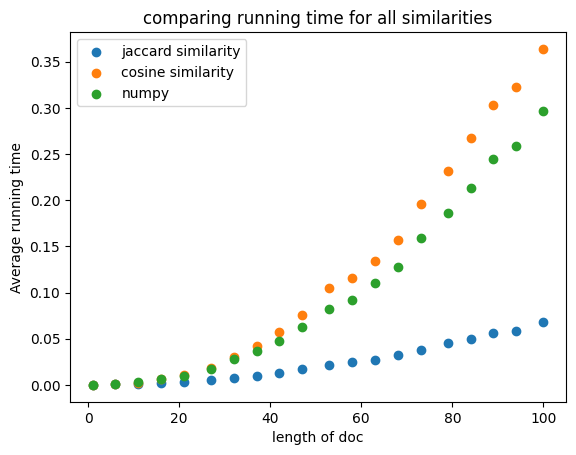

In [42]:
plt.scatter(xs_aps,times_all_pairs_jaccard,label='jaccard similarity')
plt.scatter(xs_aps,times_all_pairs_cosine,label='cosine similarity')
plt.scatter(xs_aps,times_all_pairs_numpy,label='numpy')
plt.title('comparing running time for all similarities')
plt.xlabel('length of doc')
plt.ylabel('Average running time')
plt.legend(loc='best')
plt.show()

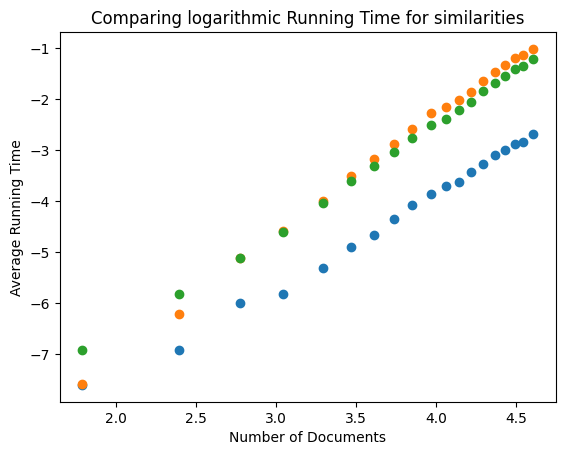

In [43]:
# Filter out non-positive values for logxs2aps and its corresponding logys values
logxs2aps, logys_jac = zip(*[(np.log(x), np.log(y)) for x, y in zip(xs_aps, times_all_pairs_jaccard) if x > 0 and y > 0])
logxs2aps, logys_cosine = zip(*[(np.log(x), np.log(y)) for x, y in zip(xs_aps, times_all_pairs_cosine) if x > 0 and y > 0])
logxs2aps, logys_numpy = zip(*[(np.log(x), np.log(y)) for x, y in zip(xs_aps, times_all_pairs_numpy) if x > 0 and y > 0])

# Plot the results
plt.scatter(logxs2aps, logys_jac, label='jaccard')
plt.scatter(logxs2aps, logys_cosine, label='cosine_dense')
plt.scatter(logxs2aps, logys_numpy, label='cosine_numpy')
plt.title('Comparing logarithmic Running Time for similarities')
plt.xlabel('Number of Documents')
plt.ylabel('Average Running Time')
plt.show()


##  3.2 Estimate the key constant in the all-pairs similarity run-time formula for both Jaccard and cosine similarity.

(see the graph above) let's assume we have 500 documnets/matrix.

**For all pair Jaccard:**

I calculate the slope and constant below. slope is coming around 1.89 which means it should be O($n^{1.89}$). I can say it is less than O($n^2$). 

But if we increase the size of the document, it will tend to O($n^2$).
Also the constant  $c_a$ for the computation is of the order of  $10^{-11}$.

So, emperically I can write the function as  
y=$10^{−11}$ $500^{1.77}$ =5.9865*$10^{-08}$


**For all pair cosine**

Slope is coming around 2.3 which means it should be O($n^{2.3}$). If we increase the size of document it will  be around O($n^3$).The constant $c_a$ for the computation is of order of $10^{-11}$.

y=$10^{−11}$ $500^{2.24}$=9.2*$10^{-07}$

**For all pair cosine numpy**

Slope is coming around 2.04 which means it should be O($n^{2.04}$). If we increase the size of document it will  tend to more than O($n^2$).The constant $c_a$ for the computation is of order of $10^{-10}$.


y=$10^{−11}$ $500^{2.04}$=2.5*$10^{-07}$

I can assume that for large document worst case running time of all pair similarity will be around or more than O($n^2$). **As I can see, There is huge difference in running time based on the algorithm chosen.**


In [44]:
res = stats.linregress(logxs2aps, logys_jac)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.8317020293609019 and intercept is -11.165406028652988


In [45]:
res = stats.linregress(logxs2aps, logys_cosine)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.3550030266041406 and intercept is -11.739032990349454


In [46]:
res = stats.linregress(logxs2aps, logys_numpy)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.0787735347405025 and intercept is -10.79709573427203


# Q4.  Write a function that implements all-pairs similarities for one of the similarity measures, using some form of parallel computing. 




In [47]:
#importing files defs.py and defs2.py
#defs.py-all pair jaccard similarity code
#defs2.py-work_that_CPU code
import defs
import defs2
import multiprocessing
from multiprocessing import Pool

In [48]:
#lab work modified over here
def core_investigation(num_repeats,num_processes,num_loops):
    a=math.floor(num_repeats/num_processes)
    
    for i in range(a):
        inputs=[(docs_list_1,'jaccard')]*num_processes
        pool_of_processes=Pool(processes=num_processes)
        xs=pool_of_processes.map(defs.all_pairs_similarities_wrapper,inputs)
        pool_of_processes.close()
        
    inputs=[num_loops]*(num_repeats-a*num_processes)
    pool_of_processes=Pool(processes=num_processes)
    pool_of_processes.map(defs2.work_that_CPU,inputs)
    pool_of_processes.close()

In [49]:
multiprocessing.cpu_count() #finding number of cores

16

In [50]:
#lab work
times=[]

for p in range(1,21):
    starttime=time.time()
    
    core_investigation(20,p,10000000)#passing the function here
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


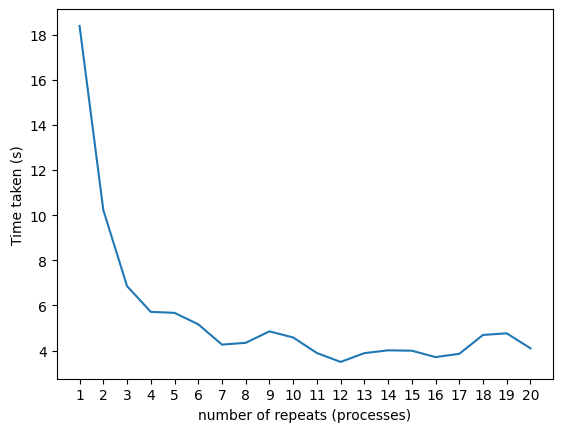

In [51]:
#lab work
import matplotlib.pyplot as plt
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of repeats (processes)")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()
#graph plot between number of process and time taken for speedup analysis

##  4.1 Analyse theoretically and empirically how much speed up it is possible to achieve on your computer.


If the number of process and cores increase, execution time decreases, so the SpeedUps can be achieved by using the parallel computing. Other than that we will also check the data matric size, how many process are running and the algorithm we are implementing. The relation between improvement and execution time is Inverse i.e. with increase in the improvement, execution time will decrease. In parallel processing, the decrease in total execution time as the ability to run parallel threads at the same time is increased with core count .

My system includes 8 cores. so improvement acheived is $\frac{O(n^2)}{8}$ where O($n^2$) is the time complexity for all pair jaccard similarity. This indicates if the execution time decreases, improvement is achieved.

For emperical analysis, I plot the graph between number of process and execution time which indicate that improvement is acheived with an increase in process.



# Q5.In theory, for a sufficiently large data matrix, all-pairs cosine similarities can be computed more efficiently by making use of Strassen’s method for matrix multiplication. Investigate this empirically and explain your findings with reference to the theory.

I wrote function cosine_similarity_strassen() in which I am passing the matrix. I implemented strassen method and naive method for calculate cosine all pairs in strassen and cosine. In naive matrix multiplication, it is computed by doing a product of a row of first matrix and column of second matrix. Since, I am doing 3iterations in my naivemult() the time complexity is **O($n^3$)**.

Strassen multiplication is more efficient as it reduces the recursive call into seven multiplications of smaller matrix. 



\begin{gather*}
T(n)=7T(\frac{n}{2})+O(n^2)
\end{gather*}
\begin{gather*}        
T(n)=O(n^{\log_2 7})=O(n^{2.81})
\end{gather*}
 


We obtain O($n^3$) time complexity for a bigger matrix size. In this case strassen matrix multiplication shine. Since strassen method is a divide and conquer method which allow reduce the time to compute all pairs cosines similarities for large datamatrices. The naive cosine similarity for all pairs, on the other hand, has time complexity O($n^{3}$). T(n) = O($n^{2.81}$) hence, faster than naive methods (using Strassen method) Computes All-Pairs Cosine Similarities using STRASSEN: The time taken to compute all-pairs cosine similarities using the strassen method here grows only logarithmically with size of the matrix ( upto O(n)) good with all_pairs cosine similarities for large data objs & Strassen menthod For small data, naive algorithm will work and for large data, it can be costly.

So I tried to figure out naively the time complexity properties for both strassen and naive cosine_similarity and compared them. But it appears strassen would yield O($n^{2.81}$) complexity whereas naive would cost O($n^{3}$), as n reaches infinity. Using Strassen method, I get O($n^{2.44}$) time complexity and for naive one time complexity is O($n^{2.48}$)


In [52]:
# #lab
def naivemult(A,B):

    (m,n) = np.shape(A)
        
    C = np.zeros([m,m])
    
    for i in range(m):
        for j in range(m):
            for k in range(m):
                C[i,j] += A[i,k] * B[k,j]
        
    return C
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)
    
    a=M[:n,:n]
    b=M[:n,n:]
    c=M[n:,:n]
    d=M[n:,n:]
    
    return (a,b,c,d)


def build(a,b,c,d):
    
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C
    

def strassen(M1, M2):
    
    if len(M1) <= 45:
        return naivemult(M1,M2)
    
    (a,b,c,d) = segment(M1)

    #note: e g f h NOT e f g h 
    (e,g,f,h) = segment(M2)

    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,f-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,f+h)
    P7 = strassen(a-c,e+g)
    
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1
    
    C = build(r,s,t,u)
    
    return C




In [53]:
def cosine_similarity_strassen(matrix):
    
    diagonal_elements = np.diag(matrix)

    sqrt_diagonal = np.sqrt(diagonal_elements)
    diagonal_matrix_sqrt=np.diag(sqrt_diagonal)
    diagonal_inv=np.linalg.inv(diagonal_matrix_sqrt)
    normalized_matrix = np.dot(np.dot(diagonal_inv,matrix),diagonal_inv)

    return normalized_matrix

In [54]:
matrix_sizes=[2**n for n in range(8,11)] 
print(matrix_sizes)


[256, 512, 1024]


In [55]:
#it takes average 4m 4.4s to run
means_strassen = []
xs_strassen=[]

for size in matrix_sizes:
    sub_matrix = np.random.rand(size, size)
    sub_matrix1=sub_matrix.T
    sub_matrix_strassen=strassen(sub_matrix1,sub_matrix)
    xs_strassen.append(size)
    means_strassen.append(timeit(cosine_similarity_strassen, sub_matrix_strassen)[1])
    

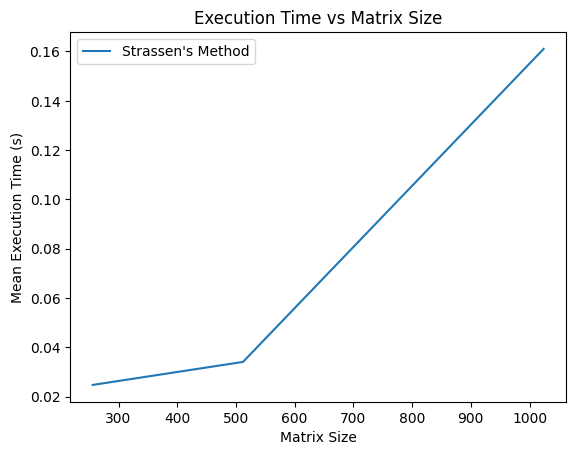

In [56]:
plt.plot(xs_strassen, means_strassen, label="Strassen's Method")
plt.xlabel('Matrix Size')
plt.ylabel('Mean Execution Time (s)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.show()

In [57]:
logxs_strassen=[np.log(x) for x in xs_strassen]
logys_strassen=[np.log(y) for y in means_strassen]

res = stats.linregress(logxs_strassen, logys_strassen)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.3497102531865697 and intercept is -11.386944455836765


In [58]:
#it takes average 8m 15.7 to run 
means_standard = []
xs_strassen=[]

for size in matrix_sizes:
    sub_matrix = np.random.rand(size, size)
    sub_matrix1=sub_matrix.T
    sub_matrix_standard=naivemult(sub_matrix1,sub_matrix)
    xs_strassen.append(size)
    means_standard.append(timeit(cosine_similarity_strassen, sub_matrix_standard)[1])

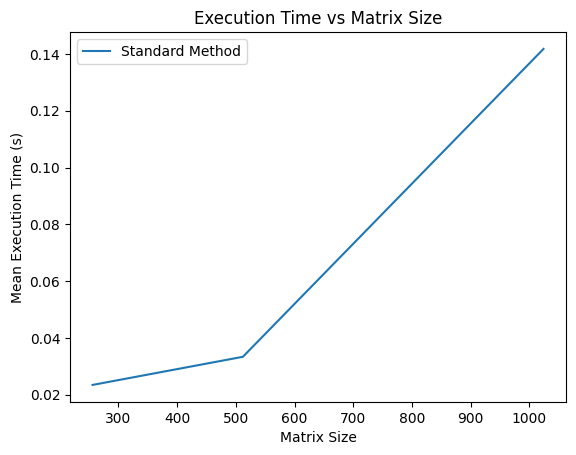

In [59]:
plt.plot(xs_strassen, means_standard, label="Standard Method")
plt.xlabel('Matrix Size')
plt.ylabel('Mean Execution Time (s)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.show()

In [60]:
logxs_strassen=[np.log(x) for x in xs_strassen]
logys_standard=[np.log(y) for y in means_standard]
res = stats.linregress(logxs_strassen, logys_standard)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.2981317403620336 and intercept is -11.134050473194453


# conclusion:

Here I describe theoretical and emperical analysis of time complexity for various similarity measures such as jaccard, cosine, cosinenumpy and all pair's similarity. By cosine,cosine_numpy and jaccard we are getting 𝑂(n) while all_pair took 𝑂($n^3$) for cosine and 𝑂($n^2$) for jaccard and cosine_numpy as its iterates through all the pairs. Using parallel computing, using jaccard to perform all pairs similarity test It can be observed that as the number of cores increases, the execution time decreases.

Finally, for cosine similarity, I use strassen matrix multiplication and check whether it is taking less time than standard multiplication of cosine. In case of cosine standard and cosine strassen, there is no such difference, but with increase in matrix size it might give better performance.


# **Conclusion and Summary**
In this report, the computational performance of cosine similarity and Jaccard similarity measures for document comparison was thoroughly investigated. The theoretical run-times were established, and empirical tests validated the theoretical claims.

### Key Takeaways
- **Cosine vs. Jaccard**: Theoretical and empirical analysis confirmed that cosine similarity has a more favorable runtime compared to Jaccard similarity.
- **All-Pairs Similarity**: The all-pairs computation exhibited quadratic growth, highlighting the importance of efficient computation methods.
- **Parallel Computing**: Parallelization significantly reduced computation time, demonstrating the value of multiprocessing for large-scale document comparisons.
- **Strassen's Method**: Theoretical insights and empirical evidence revealed the potential of Strassen’s method for large matrix-based similarity computations.

This investigation highlights the necessity of optimizing similarity measures when working with large document datasets. The findings suggest potential future improvements, including the exploration of approximate similarity techniques to further reduce computational cost.
    

# Report Word count

In [1]:
filepath="Algorithmic Data Science jupyter notebook.ipynb"
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")


Submission length is 1996
